##THE SPARKS FOUNDATION

##TASK -02

###**GRIP-NOVEMBER23**

###NAME: SHAIVAL K. JADHAV

Problem Statement -

From the given 'Iris dataset' predict the optimum number of cluster and represent it visually.

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Data Loading

In [2]:
# importing the iris dataset
data = pd.read_csv("/content/Iris.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = data.iloc[:, [0, 1, 2, 3]].values

Removing the ID column

In [4]:
# Drop the 'ID' column from the DataFrame
data = data.drop(columns=['Id'])

##Summary of The Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Count the number of occurrences of each unique value in the 'Species' column
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
#Calculate the mean of each numerical column grouped by the 'Species' column
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Data Visualization

In [11]:
#separating the original dataset into three subsets, each containing data for a specific species of iris flower: setosa, virginica, and versicolor
iris_setosa=data.loc[data["Species"]=="Iris-setosa"]
iris_virginica=data.loc[data["Species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["Species"]=="Iris-versicolor"]

Box plot-
Box plots helps to compare the distributions of different features (sepal length, sepal width, petal length, petal width) across different species

<Axes: >

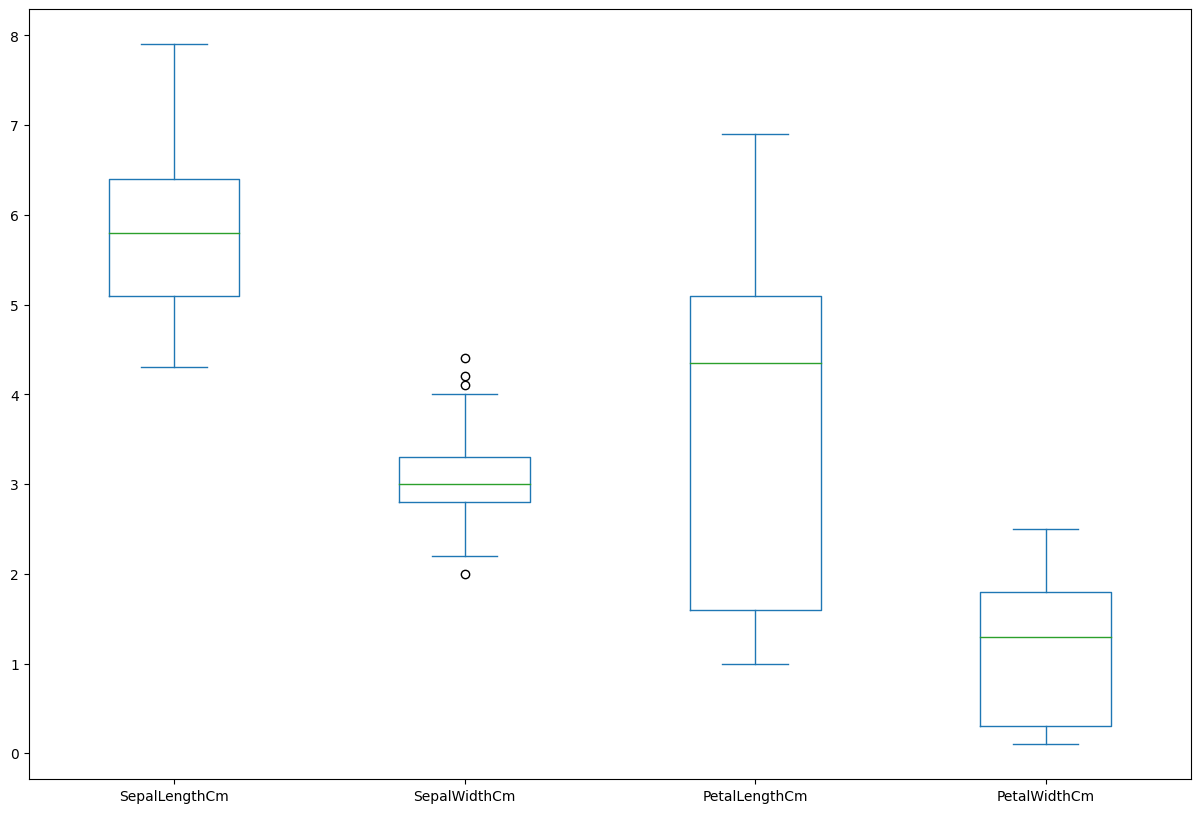

In [12]:
data.plot(kind='box' , sharex = False , sharey = False, figsize=(15,10))

As we can see there are some outliers in 'SepalWidthCm' column

In [13]:
# Removing the outliers from 'SepalWidthCm' column
column_name = 'SepalWidthCm'

# Calculate the IQR (Interquartile Range)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the specified column
outliers = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

# Remove outliers from the DataFrame
data = data[~outliers]

# Display the number of outliers removed
print(f'Number of outliers removed: {sum(outliers)}')

# Now 'data_no_outliers' contains the DataFrame without outliers in the specified column


Number of outliers removed: 4


<Axes: >

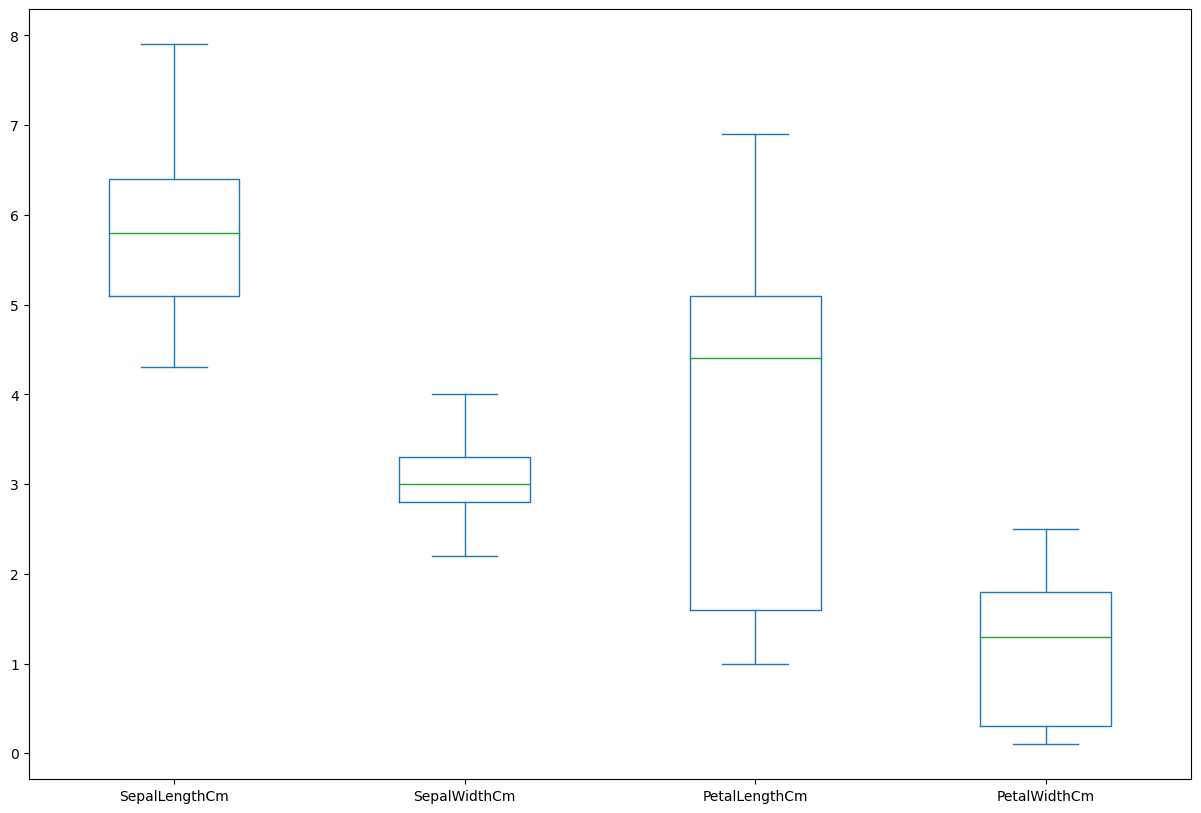

In [14]:
#box plot after removing outliers
data.plot(kind='box' , sharex = False , sharey = False, figsize=(15,10))

Violin plot

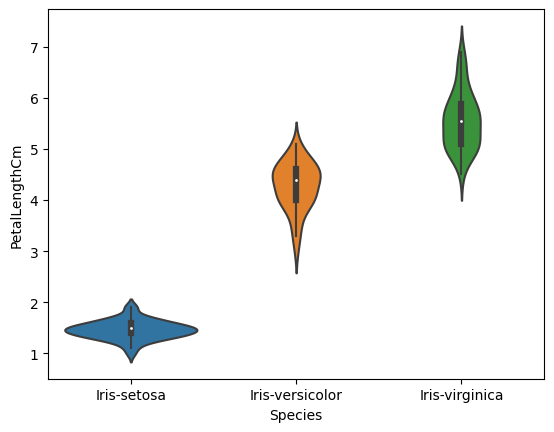

In [15]:
sns.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

Scatter Plot- allows us to quickly visualize the pairwise relationships between different features.

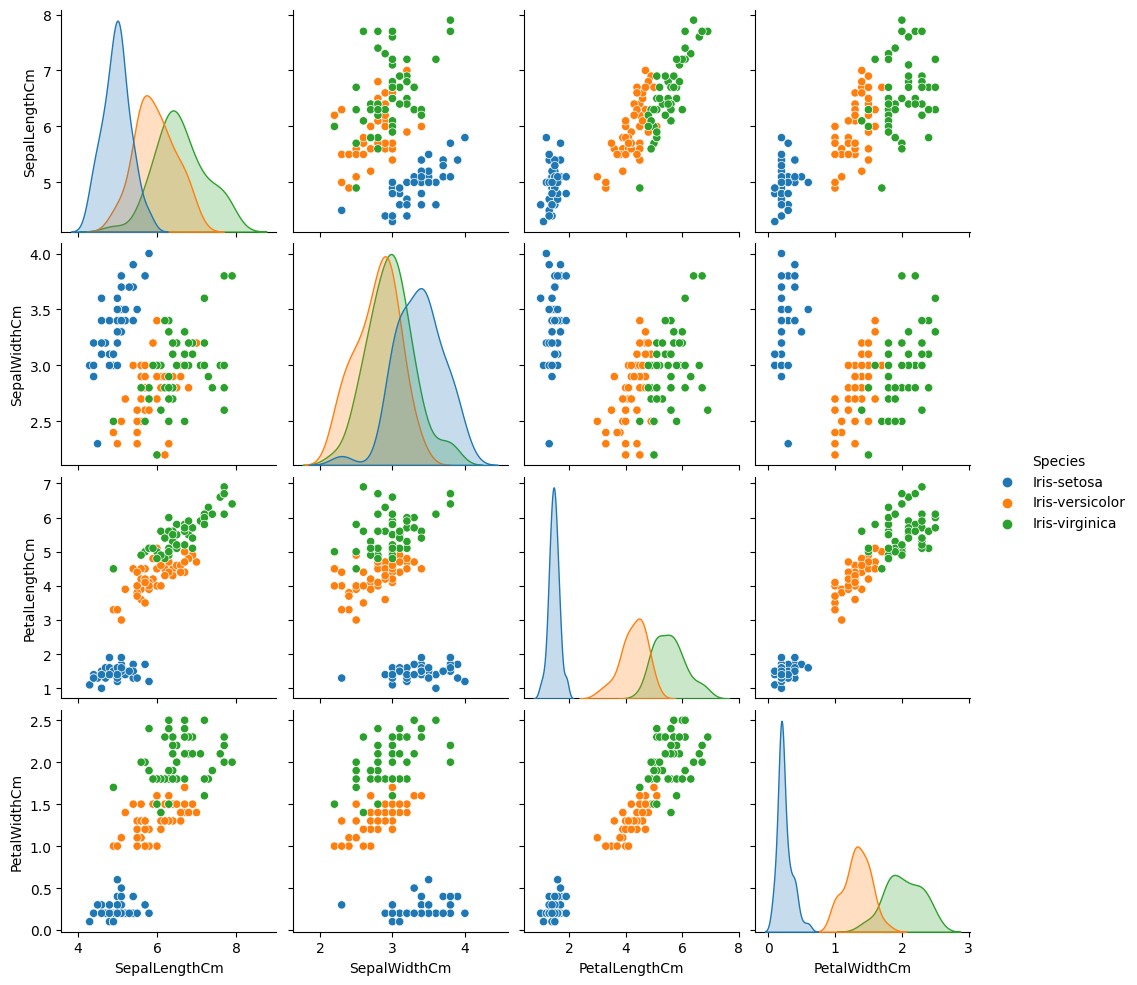

In [16]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(data, hue="Species")

##K-MEANS
K-means is a popular unsupervised machine learning algorithm used for clustering data. The primary goal of K-means clustering is to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid).

In [17]:
x1 = data.iloc[:, [0, 1, 2, 3]].values

In [18]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

Using the elbow method to determine the optimal number of clusters for k-means clustering

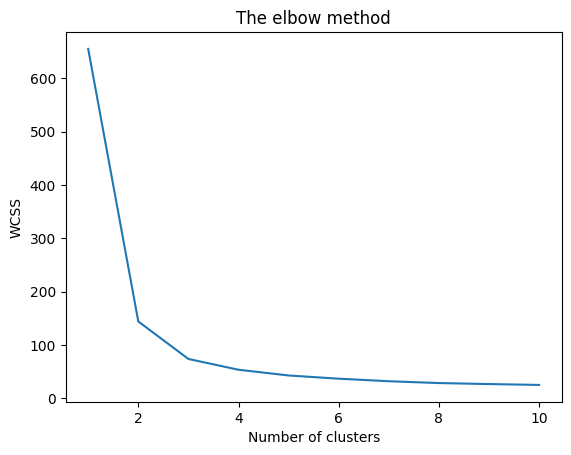

In [19]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

We can clearly see from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
From this we choose the number of clusters as **3**

##Implementing K-Means Clustering

In [20]:
# Create a K-means clustering model with the specified parameters:
# n_clusters: Number of clusters to form (here, 3 clusters for the three Iris species).
# init: Method for initializing centroids. 'k-means++' is a smart initialization strategy.
# max_iter: Maximum number of iterations for the K-means algorithm to converge.
# n_init: Number of times the K-means algorithm will be run with different centroid seeds.
# random_state: Seed for reproducibility of results.

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Apply the algorithm to the feature matrix 'x' and obtaining the cluster labels.
y_kmeans = kmeans.fit_predict(x1)

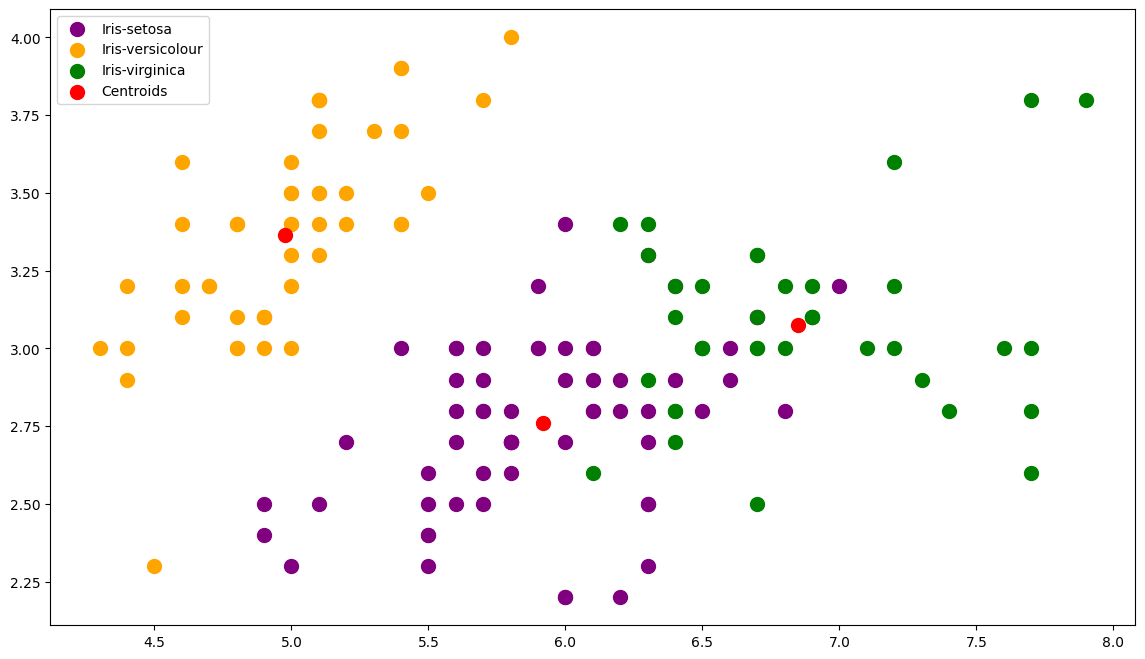

In [21]:
# Set the size of the scatter plot
plt.figure(figsize=(14, 8))

#Visualising the clusters
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

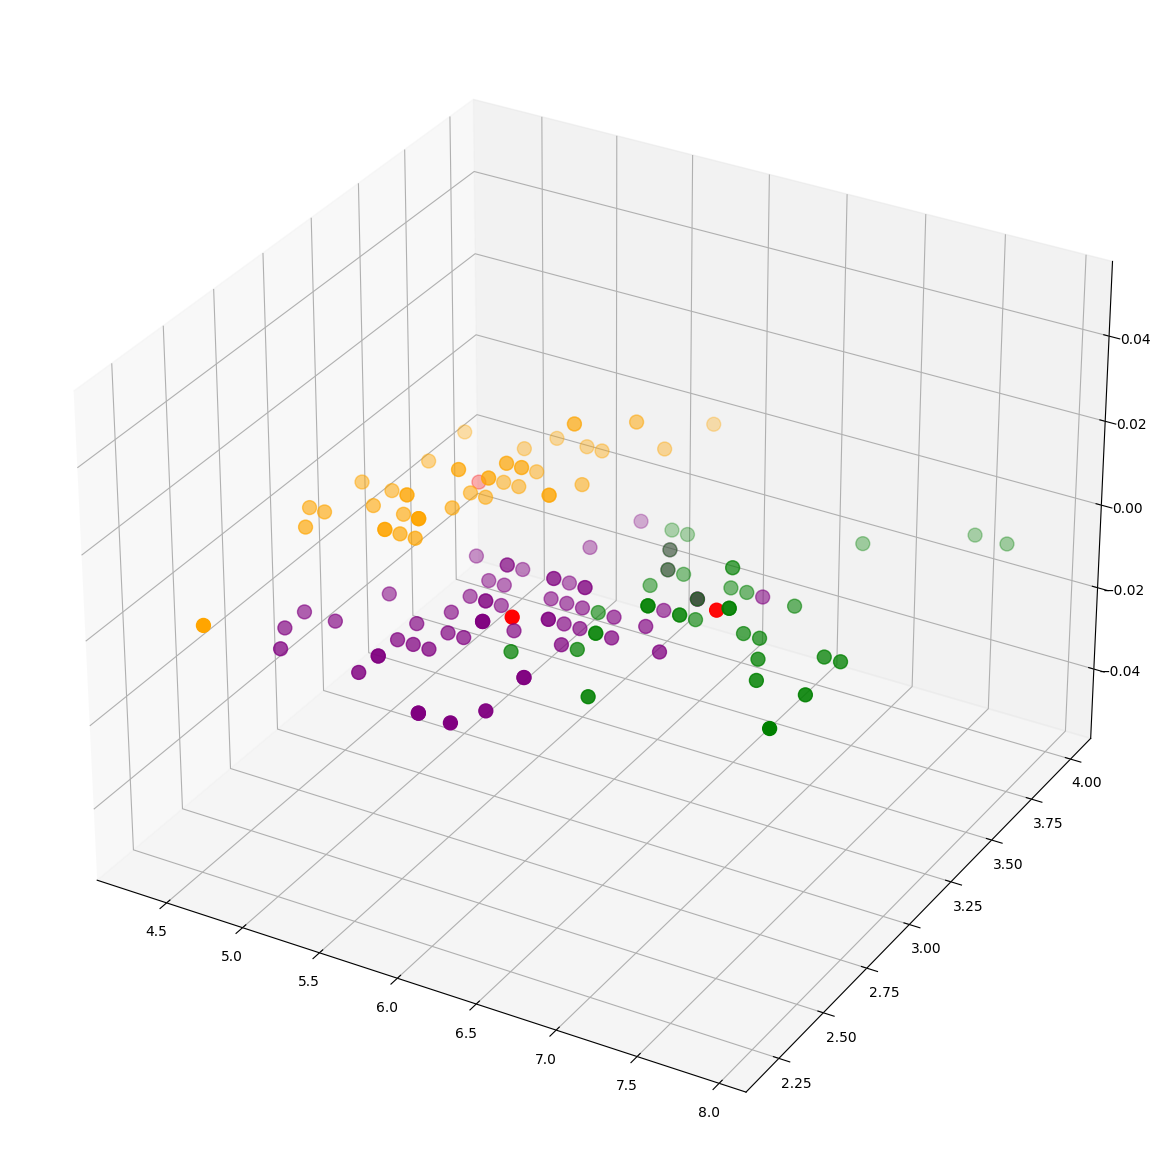

In [22]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

Conclusion:

The K-means analysis of the Iris dataset grouped flowers into three categories based on their features. This clustering visually shows that the algorithm effectively distinguishes between different types of iris flowers, demonstrating its ability to uncover natural patterns in the data.